# TF-IDF

In [64]:
#불용어 읽어오기
stopwords_file_path = 'stopwords_dh_last.txt'
stopwords = []
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    stopwords = [line.strip() for line in file.readlines()]


In [65]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# 1. 피클 파일에서 Series 불러오기
with open('data/okt.pkl', 'rb') as f:
    normalized = pickle.load(f)

# 2. TF-IDF 벡터라이저 설정: 상위 10,000개의 단어만 사용하고 불용어 제거
vectorizer = TfidfVectorizer(max_features=10000, stop_words=stopwords, min_df=2, max_df=0.95)

# 3. 데이터프레임을 1000개씩 나눠서 처리할 준비
chunk_size = 1000
tfidf_result = []  # 청크 처리 결과를 저장할 리스트

print("처리 시작...")

# 4. 데이터를 청크로 나누어 처리
for i in range(0, len(normalized), chunk_size):
    # 현재 청크 데이터 추출
    doc_chunk = normalized[i:i+chunk_size]
    
    # TF-IDF 적용
    tfidf_array = vectorizer.fit_transform(doc_chunk)
    
    # 청크 결과를 데이터프레임으로 변환하여 리스트에 저장
    tfidf_result.append(pd.DataFrame(tfidf_array.toarray(), columns=vectorizer.get_feature_names_out()))
    
    # 청크 처리 완료 메시지 출력
    print(f"{i+chunk_size}개 문서 처리 완료")

# 5. 모든 청크를 하나의 데이터프레임으로 합침
tfidf_df = pd.concat(tfidf_result, ignore_index=True)

# 6. 최종 결과 확인 (상위 5개 출력)
print("최종 결과:")
print(tfidf_df.head())

# 7. 데이터프레임의 크기 및 처리 완료 메시지
print(f"TF-IDF 처리 완료. 최종 데이터프레임 크기: {tfidf_df.shape}")

처리 시작...


c:\Users\user\anaconda3\envs\myenv\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['겸박월금의소송수계인', '경락인', '고지명령청구자', '공동소송적', '국선', '군검찰관', '낙찰인', '낙찰자', '당심', '독립참가', '매수인', '미성년자', '반심판피청구인', '반심피청구인', '법정대리인', '변론관여', '본심판상대방', '본안원고', '비약', '비약적', '사선', '소외1소송수계인', '수계신청인', '신청인겸파산자', '예비적', '위반자', '유언자', '유언집행자', '이의피신청인', '자녀', '재심상대방', '재심판청구인', '재심피청구인', '제3공탁자', '주1', '주위적', '중간확인피고', '탈퇴', '피공개', '피이의신청인'] not in stop_words.
  warnings.warn(


1000개 문서 처리 완료
2000개 문서 처리 완료
3000개 문서 처리 완료
4000개 문서 처리 완료
5000개 문서 처리 완료
최종 결과:
    가게   가격   가공   가관   가구   가금   가기       가까이   가끔   가나  ...  하야  하퇴골  한성수  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ... NaN  NaN  NaN   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.039157  0.0  0.0  ... NaN  NaN  NaN   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ... NaN  NaN  NaN   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ... NaN  NaN  NaN   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ... NaN  NaN  NaN   

   한재영  할리  항내  형무소  호증등  화차  훈련소  
0  NaN NaN NaN  NaN  NaN NaN  NaN  
1  NaN NaN NaN  NaN  NaN NaN  NaN  
2  NaN NaN NaN  NaN  NaN NaN  NaN  
3  NaN NaN NaN  NaN  NaN NaN  NaN  
4  NaN NaN NaN  NaN  NaN NaN  NaN  

[5 rows x 15843 columns]
TF-IDF 처리 완료. 최종 데이터프레임 크기: (4189, 15843)


In [89]:
tfidf_df.to_csv('data/tfidf_injury.csv')

In [66]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 불용어 제거 및 LDA 적용
def remove_stopwords(text):
    tokens = text.split()  # 공백으로 나누기
    filtered_tokens = [word for word in tokens if word not in stopwords]  # 불용어 제거
    return ' '.join(filtered_tokens)  # 다시 문자열로 결합

normalized_cleaned = [remove_stopwords(' '.join([word for word in text.split() if word not in stopwords])
) for text in normalized]

# TF-IDF 벡터라이저 적용
vectorizer = TfidfVectorizer(max_features=10000)
tfidf_matrix = vectorizer.fit_transform(normalized_cleaned)

# K-Means 클러스터링 수행 (k=5로 설정)
num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(tfidf_matrix)

# 클러스터별 상위 단어 및 그 단어들의 TF-IDF 값 확인
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

print("클러스터별 상위 단어 및 TF-IDF 값:")
for i in range(num_clusters):
    print(f"\n클러스터 {i+1}:")
    for ind in order_centroids[i, :10]:  # 상위 10개의 단어
        print(f"단어: {terms[ind]} - TF-IDF 값: {km.cluster_centers_[i, ind]}")

클러스터별 상위 단어 및 TF-IDF 값:

클러스터 1:
단어: 사고 - TF-IDF 값: 0.1331400810690274
단어: 차량 - TF-IDF 값: 0.12649022766335524
단어: 운전 - TF-IDF 값: 0.10422353304345731
단어: 자동차 - TF-IDF 값: 0.07841975837102554
단어: 운행 - TF-IDF 값: 0.07149698403133767
단어: 교통사고 - TF-IDF 값: 0.06138010237603664
단어: 운전자 - TF-IDF 값: 0.05294399816962937
단어: 도로 - TF-IDF 값: 0.052026760253498776
단어: 도로교통법 - TF-IDF 값: 0.05066254184993102
단어: 차선 - TF-IDF 값: 0.04363008950623311

클러스터 2:
단어: 사고 - TF-IDF 값: 0.14022591847415783
단어: 손해 - TF-IDF 값: 0.1097981531283013
단어: 노동 - TF-IDF 값: 0.07928602477481207
단어: 지급 - TF-IDF 값: 0.0776998259003419
단어: 치료 - TF-IDF 값: 0.0723859288226575
단어: 상실 - TF-IDF 값: 0.05105142817573669
단어: 손해배상 - TF-IDF 값: 0.04746093675815439
단어: 장해 - TF-IDF 값: 0.04614041377198594
단어: 수입 - TF-IDF 값: 0.04439844142555034
단어: 일용 - TF-IDF 값: 0.039028405304253826

클러스터 3:
단어: 형법 - TF-IDF 값: 0.09937385241199911
단어: 산입 - TF-IDF 값: 0.07704079143133238
단어: 징역 - TF-IDF 값: 0.06727677858235209
단어: 본형 - TF-IDF 값: 0.05854010786740356
단어: 강간

# K-평균 군집화

In [15]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib

# 한글 폰트 경로 설정 (예: Malgun Gothic)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 시스템에 설치된 폰트 경로
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 문제 해결하기
matplotlib.rcParams['axes.unicode_minus'] = False


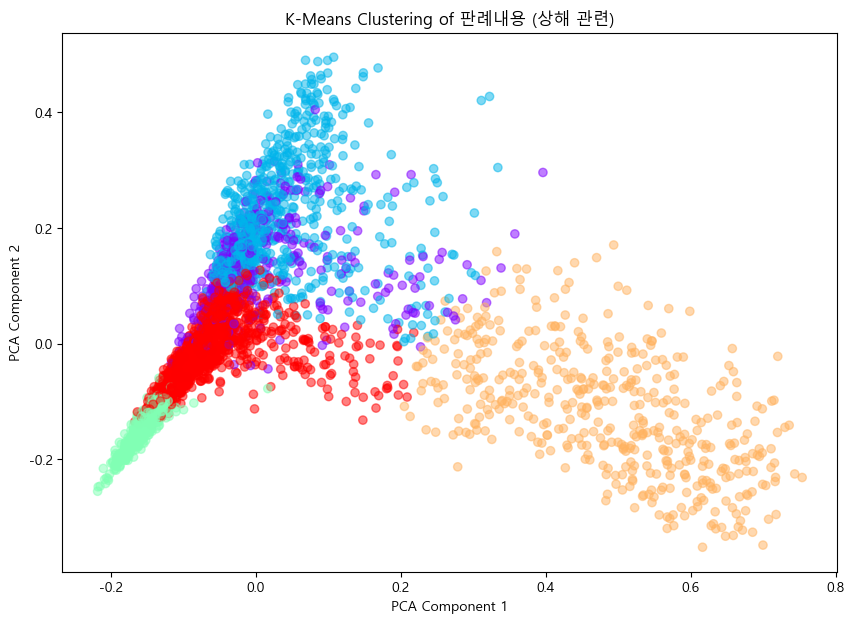

In [78]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

num_clusters = 5
km = KMeans(n_clusters=num_clusters,init='k-means++' ,random_state=42)
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

# 9. PCA를 사용한 2D 시각화 (차원 축소)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='rainbow', alpha=0.5)
plt.title('K-Means Clustering of 판례내용 (상해 관련)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


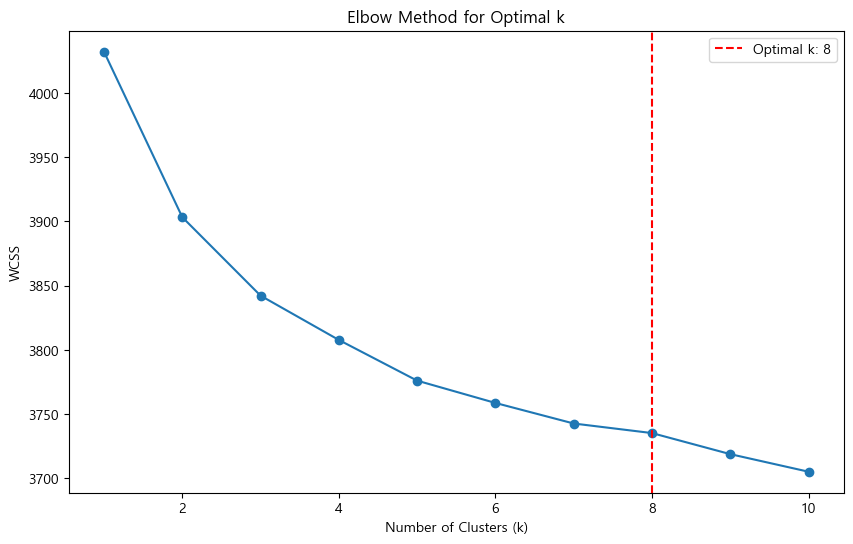

엘보우 포인트 k: 8


In [79]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

wcss = []
k_range = range(1, 11)  # k 값을 1에서 10까지 시도

for k in k_range:
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')

# 엘보우 포인트 자동 감지
diff = np.diff(wcss)  # 1차 미분
diff2 = np.diff(diff)  # 2차 미분
elbow_index = np.argmin(diff2) + 2  # 엘보우 포인트 인덱스 (k는 2부터 시작)

# 엘보우 포인트 표시
plt.axvline(x=elbow_index, color='red', linestyle='--', label=f'Optimal k: {elbow_index}')
plt.legend()
plt.show()

print(f"엘보우 포인트 k: {elbow_index}")
#Wcss의 감소가 완만해지는 elbow 지점을 k=4~5이므로 k=4가 적절하다.

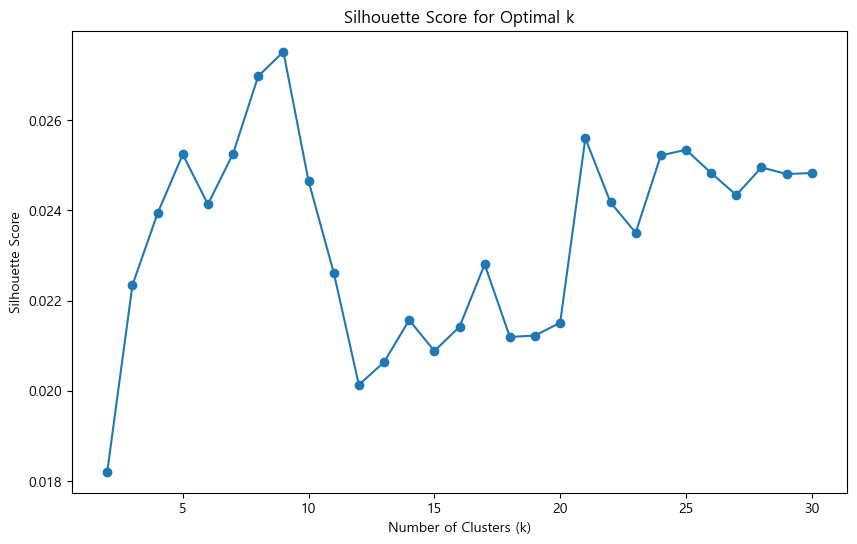

In [80]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 31):  # k 값을 2에서 10까지 시도
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42)
    kmeans.fit(tfidf_matrix)
    silhouette_scores.append(silhouette_score(tfidf_matrix, kmeans.labels_))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 31), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# 실루엣 계수 해석:
# 0.5 이상: 잘 정의된 클러스터로 간주
# 0.25 ~ 0.5: 약간의 겹침이 있지만 여전히 유의미한 클러스터
# 0.25 이하: 클러스터링 결과가 좋지 않음

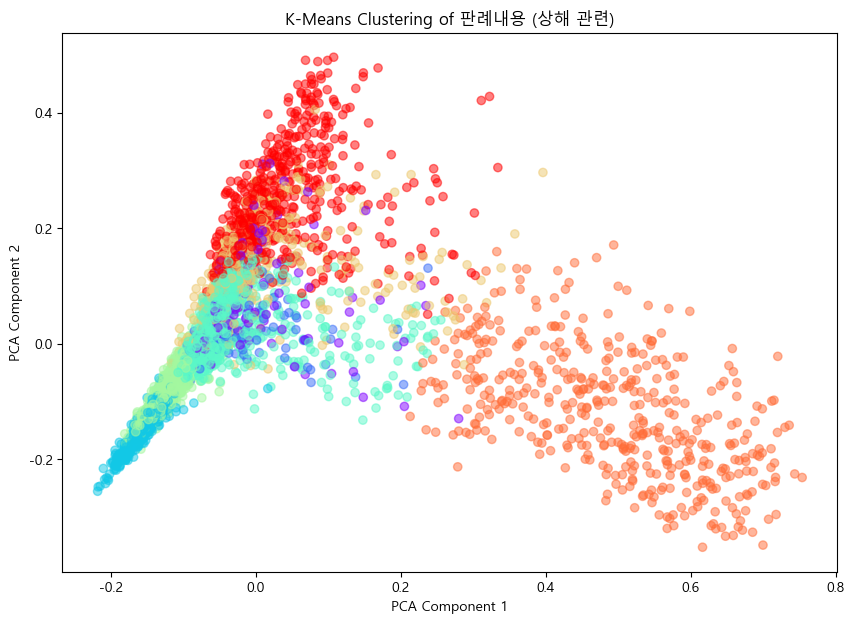

In [81]:
# K-Means 클러스터링 수행 (k=4로 설정)
num_clusters = 8
km = KMeans(n_clusters=num_clusters,init='k-means++', random_state=42)
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

#PCA를 사용한 2D 시각화 (차원 축소)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='rainbow', alpha=0.5)
plt.title('K-Means Clustering of 판례내용 (상해 관련)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


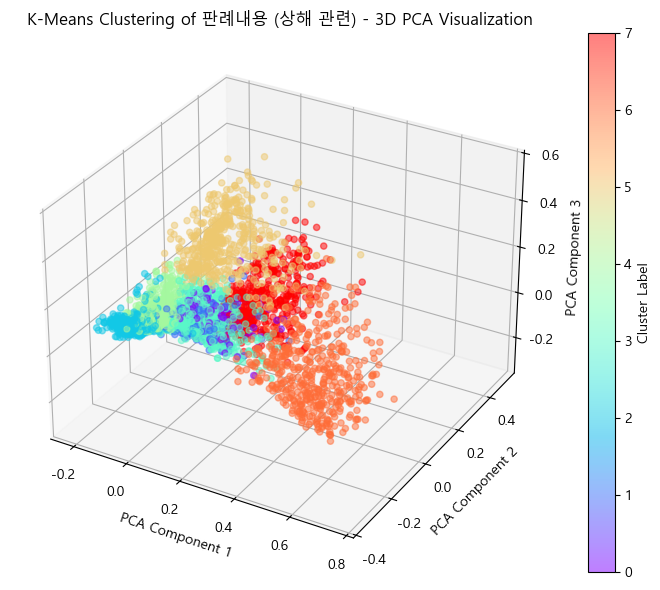

In [86]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# K-Means 클러스터링 수행 (k=4로 설정)
num_clusters = 8
km = KMeans(n_clusters=num_clusters,init='k-means++', random_state=42)
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

#PCA를 사용한 2D 시각화 (차원 축소)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# 3D 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=km.labels_, cmap='rainbow', alpha=0.5)

# 그래프 레이블 설정
ax.set_title('K-Means Clustering of 판례내용 (상해 관련) - 3D PCA Visualization')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# 컬러바 추가
fig.colorbar(scatter, ax=ax, label='Cluster Label')
plt.show()

PCA Component 수 정하기

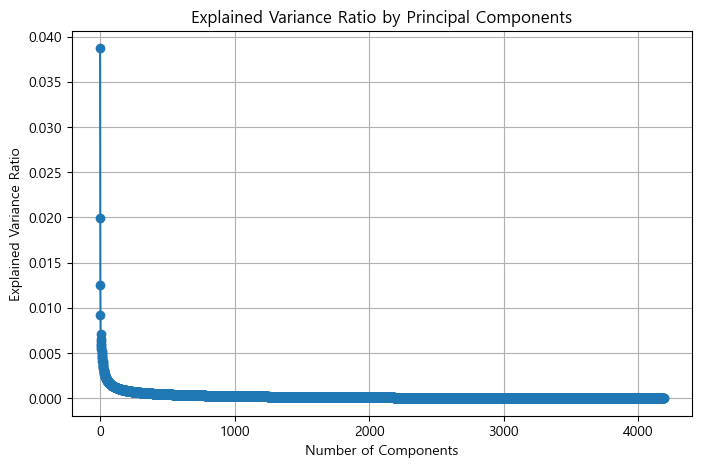

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# 1. 설명된 분산 비율(Explained Variance Ratio)

# PCA 모델 생성
pca = PCA()
pca.fit(tfidf_matrix.toarray())

# 설명된 분산 비율 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

주변수 하나로는 7%, 두번쨰까지는 합해서 10%가 설명됨

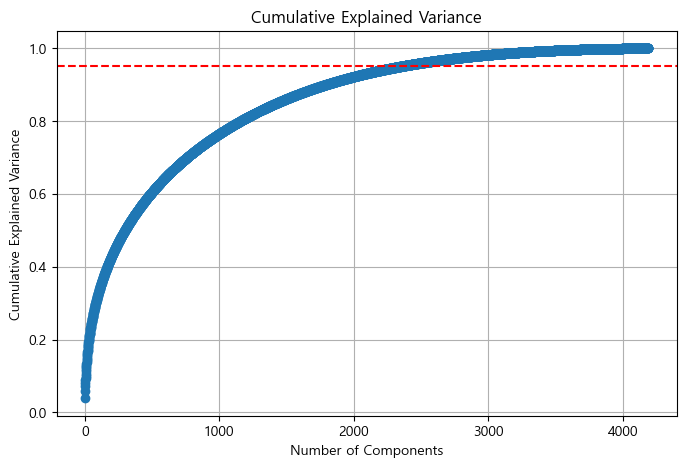

In [38]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% 기준선
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [40]:
import numpy as np


# 설명된 분산 비율과 누적 설명된 분산 비율 계산
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# 기준선 설정
threshold = 0.95

# 기준선에 도달하는 주성분 개수 찾기
num_components = np.argmax(cumulative_variance >= threshold) + 1

# 결과 출력
print(f"누적 설명된 분산 비율이 {threshold*100}%에 도달하는 주성분의 개수: {num_components}")

누적 설명된 분산 비율이 95.0%에 도달하는 주성분의 개수: 2347


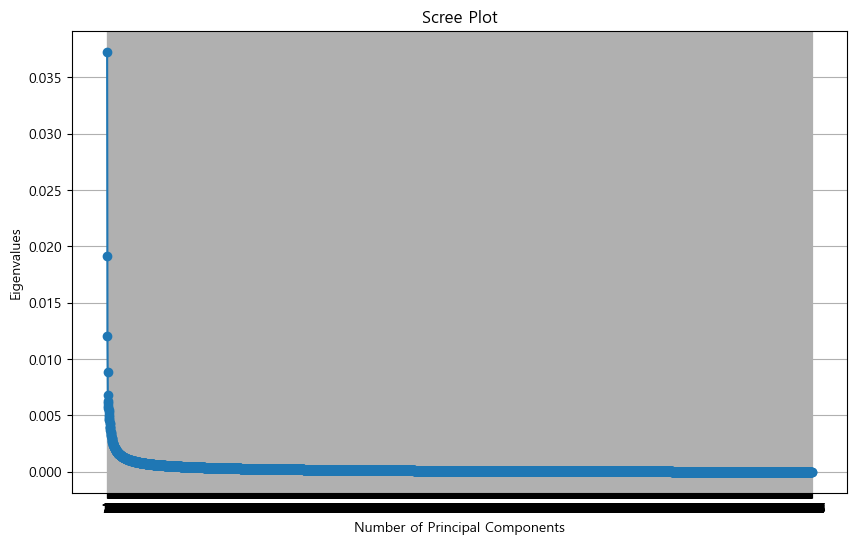

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 데이터 준비
# data = your_data_here (예: tfidf_matrix.toarray())

# PCA 모델 생성 및 학습
pca = PCA()
pca.fit(tfidf_matrix.toarray())

# 고유값 가져오기
eigenvalues = pca.explained_variance_

# Scree Plot 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Eigenvalues')
plt.xticks(np.arange(1, len(eigenvalues) + 1, 1))  # x축 눈금 조정
plt.grid()
plt.show()

In [42]:
# 기울기 계산
differences = np.diff(explained_variance)  # 설명된 분산 비율의 차이
slopes = np.abs(differences)  # 기울기
# 기울기 출력
print("기울기:")
for i, slope in enumerate(slopes, start=1):
    print(f"주성분 {i}: 기울기 = {slope:.4f}")

# 기울기가 급격히 감소하는 지점 찾기
elbow_point = np.argmax(slopes) + 1  # 엘보우 포인트 (기울기가 가장 큰 지점)
print(f"\n엘보우 포인트: 주성분 {elbow_point}, 기울기 = {slopes[elbow_point - 1]:.4f}")

기울기:
주성분 1: 기울기 = 0.0188
주성분 2: 기울기 = 0.0074
주성분 3: 기울기 = 0.0033
주성분 4: 기울기 = 0.0021
주성분 5: 기울기 = 0.0006
주성분 6: 기울기 = 0.0002
주성분 7: 기울기 = 0.0003
주성분 8: 기울기 = 0.0001
주성분 9: 기울기 = 0.0002
주성분 10: 기울기 = 0.0002
주성분 11: 기울기 = 0.0003
주성분 12: 기울기 = 0.0001
주성분 13: 기울기 = 0.0002
주성분 14: 기울기 = 0.0002
주성분 15: 기울기 = 0.0002
주성분 16: 기울기 = 0.0001
주성분 17: 기울기 = 0.0003
주성분 18: 기울기 = 0.0000
주성분 19: 기울기 = 0.0001
주성분 20: 기울기 = 0.0002
주성분 21: 기울기 = 0.0001
주성분 22: 기울기 = 0.0001
주성분 23: 기울기 = 0.0000
주성분 24: 기울기 = 0.0001
주성분 25: 기울기 = 0.0001
주성분 26: 기울기 = 0.0002
주성분 27: 기울기 = 0.0000
주성분 28: 기울기 = 0.0001
주성분 29: 기울기 = 0.0001
주성분 30: 기울기 = 0.0000
주성분 31: 기울기 = 0.0001
주성분 32: 기울기 = 0.0001
주성분 33: 기울기 = 0.0000
주성분 34: 기울기 = 0.0000
주성분 35: 기울기 = 0.0001
주성분 36: 기울기 = 0.0001
주성분 37: 기울기 = 0.0000
주성분 38: 기울기 = 0.0001
주성분 39: 기울기 = 0.0000
주성분 40: 기울기 = 0.0001
주성분 41: 기울기 = 0.0000
주성분 42: 기울기 = 0.0001
주성분 43: 기울기 = 0.0000
주성분 44: 기울기 = 0.0000
주성분 45: 기울기 = 0.0000
주성분 46: 기울기 = 0.0000
주성분 47: 기울기 = 0.0000
주성분 48: 기울기 = 0.0

적절한 주성분은 1차원으로 나왔지만 PCA는 2개이상의 주성분을 가지므로 옳지않다. 차순위로 큰 순서대로 주성분을 조절한다.

# 네트워크 분석

In [73]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

#각 클러스터별로 TF-IDF가 높은 단어 확인 (상위 10개 단어 출력)
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

cluster_top_terms = {}

print("클러스터별 상위 10개 단어:")
for i in range(num_clusters):
    print(f"\n클러스터 {i+1}:")
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    cluster_top_terms[i] = top_terms  # 클러스터별 상위 10개 단어 저장
    for term in top_terms:
        print(f" {term}")

tfidf_cluster_matrix = np.zeros((num_clusters, len(terms)))

for cluster in range(num_clusters):
    for term in cluster_top_terms[cluster]:  # 클러스터 번호가 1부터 시작하므로 인덱스 조정
        if term in terms:
            term_index = np.where(terms == term)[0][0]
            tfidf_cluster_matrix[cluster, term_index] = 1  # 클러스터에서의 단어 존재 여부를 1로 표시

# 클러스터 간 유사도 계산
similarity_matrix = cosine_similarity(tfidf_cluster_matrix)

클러스터별 상위 10개 단어:

클러스터 1:
 작업
 공사
 사고
 회사
 안전
 설치
 건물
 감독
 선박
 현장

클러스터 2:
 징계
 회사
 해고
 근로자
 임금
 노동조합
 근로
 재해
 사업
 조합원

클러스터 3:
 형법
 산입
 본형
 징역
 감호
 일수
 폭력
 강도
 후의
 구금

클러스터 4:
 지급
 치료
 사고
 손해
 망인
 이혼
 부담
 의무
 혼인
 병원

클러스터 5:
 폭행
 강간
 형법
 경찰관
 상해
 경찰
 폭력
 형사소송법
 공소
 체포

클러스터 6:
 사고
 차량
 운전
 자동차
 운행
 교통사고
 운전자
 도로
 도로교통법
 차선

클러스터 7:
 보험
 계약
 보험금
 지급
 자동차
 사고
 손해
 급여
 사망
 회사

클러스터 8:
 사고
 손해
 노동
 지급
 치료
 상실
 수입
 손해배상
 일용
 종사


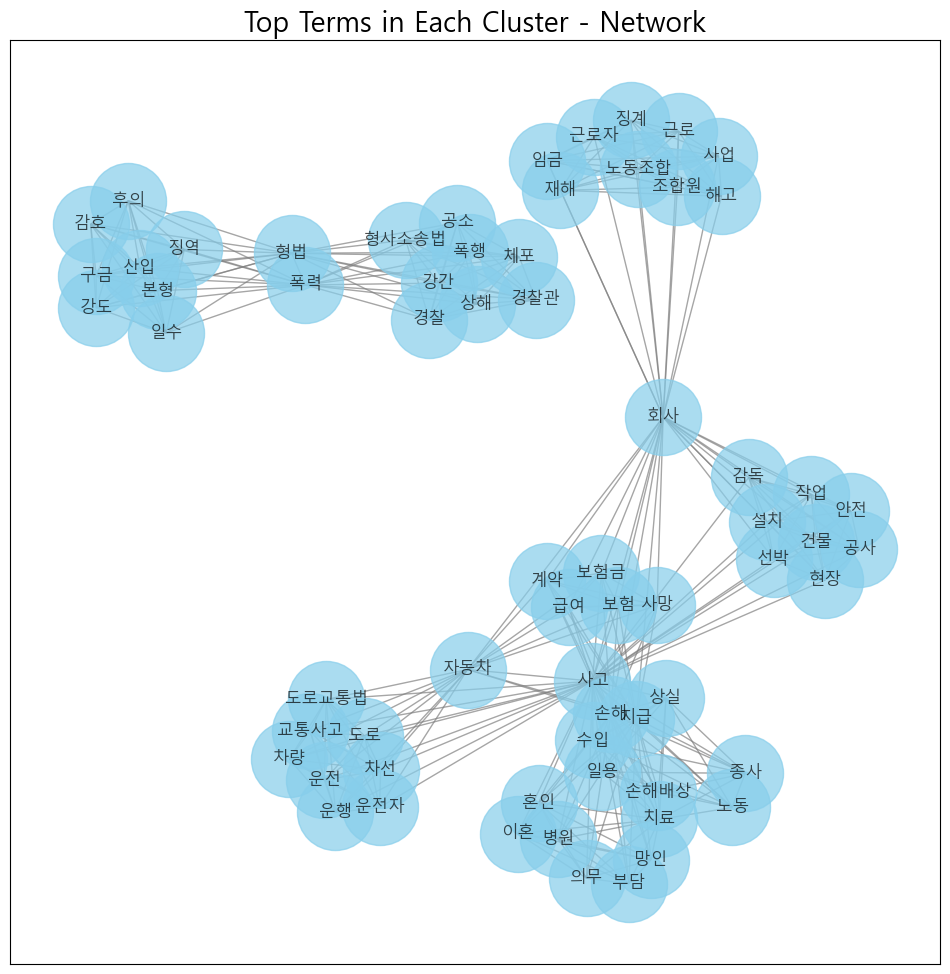

In [77]:
import matplotlib.pyplot as plt
import networkx as nx

# 한글 폰트 설정 (Windows에서의 Malgun Gothic)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 폰트 경로 설정
font_prop = font_manager.FontProperties(fname=font_path)

G = nx.Graph()

# # 클러스터 간 엣지 추가
# for i in range(num_clusters):
#     for j in range(i + 1, num_clusters):
#         if similarity_matrix[i, j] > 0:  # 유사도가 0 이상인 경우에 엣지 추가
#             G.add_edge(f'Cluster {i + 1}', f'Cluster {j + 1}', weight=similarity_matrix[i, j])

# 클러스터별 상위 단어들 사이의 엣지를 추가
for cluster, top_terms in cluster_top_terms.items():
    for i in range(len(top_terms)):
        for j in range(i+1, len(top_terms)):
            G.add_edge(top_terms[i], top_terms[j], weight=1)  # 단순 엣지 추가 (공동 출현 가정)

# 네트워크 시각화
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)

# 노드 및 엣지 그리기, 한글 폰트 적용
nx.draw_networkx(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_color="black", edge_color="gray", alpha=0.7, font_family=font_prop.get_name())

# 제목에도 한글 폰트 적용
plt.title("Top Terms in Each Cluster - Network", fontproperties=font_prop, fontsize=20)

plt.show()

네트워크 분석 파라미터 조정해서 시각화 더 좋게